In [4]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(0)
n_samples = 1000
n_outliers = 50

X = np.random.randn(n_samples, 1) * 10
y = 2 * X.ravel() + np.random.randn(n_samples) * 2

# Add outlier data
X[:n_outliers] = 30 + 0.7 * np.random.randn(n_outliers, 1)
y[:n_outliers] = -4 + 10 * np.random.randn(n_outliers)

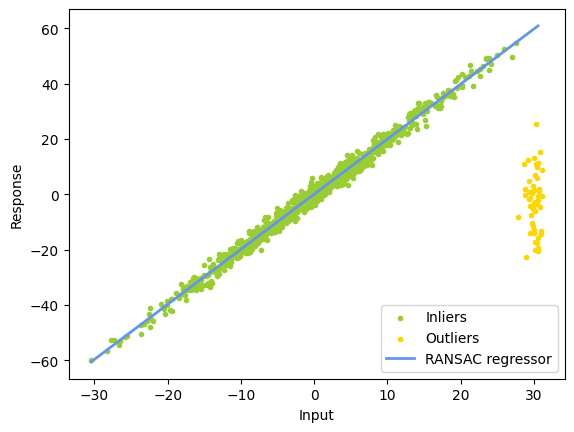

In [5]:
# Fit line using RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)

# Compare results
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

In [6]:
import numpy as np
import cv2
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures

# Load your image (assuming it's a binary image)
# Replace 'path_to_image' with the path to your image
image = cv2.imread('/home/haohang/CS-558/hw2/result/keypoint.png', 0)

# Detect the points (You might need to adapt this based on your image)
# Assuming objects/points of interest are white on a black background
y, x = np.where(image > 0)

# The coordinates extracted are the features and response variables for RANSAC
# For line fitting, x can be the feature and y can be the target/response
X = x.reshape(-1, 1)
Y = y


In [15]:
# Fit line using RANSAC algorithm
ransac = RANSACRegressor(residual_threshold=4, min_samples=2)
ransac.fit(X, Y)

# To plot or further analyze, get the inlier mask and predictions
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)

In [21]:
line_X

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

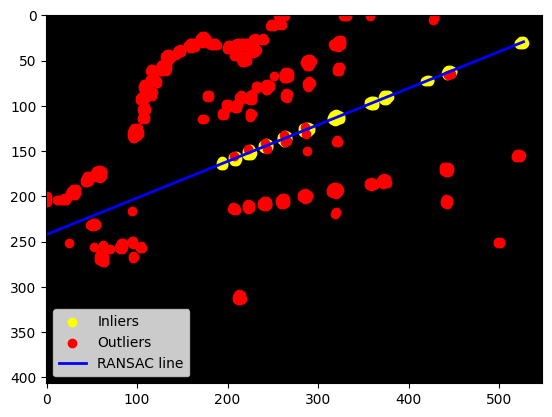

In [16]:
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')
plt.scatter(X[inlier_mask], Y[inlier_mask], color='yellow', label='Inliers')
plt.scatter(X[outlier_mask], Y[outlier_mask], color='red', label='Outliers')
plt.plot(line_X, line_y_ransac, color='blue', linewidth=2, label='RANSAC line')
plt.legend()
plt.show()
